## Output: optimal cutoffs and mean ROC curve

In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import auc, plot_roc_curve, precision_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
import csv
import statistics

In [74]:
root = "/media/visiopharm5/WDGold/deeplearning/MIL/CLAM/eval_results_349_tumor_masked"
# with_anno = False
# if with_anno:
#     root = ps.path.join(root, "")
# else:
#     path_label = "/media/visiopharm5/WDGold/deeplearning/Hepatocarcinomes/TCGA/heatmap"

# flabel = "sample_clusters_full_median_cnmf_ordered_hc_ward.D2_euclidean_3.csv" # v3
# output = "dataset_csv/tcga_hcc_354_v4"
target = "EVAL_tcga_hcc_tumor-masked_349_T-cell_Exhaustion_cv_highvsrest_622_CLAM_50_s1_cv"
path = os.path.join(root, target)

In [75]:
k = 10
nslides = []
df = pd.DataFrame()

for fold in range(k):
    tmp = pd.read_csv(os.path.join(path, "fold_"+str(fold)+".csv"))
    nslides.append(tmp.shape[0])
    df = pd.concat([df, tmp])
    
print(nslides)
print(df.shape)
display(df.head(5))

[69, 68, 70, 72, 70, 70, 73, 69, 70, 69]
(700, 5)


,slide_id,Y,Y_hat,p_0,p_1
0,TCGA-DD-AAVP-01Z-00-DX1.44A8666F-DF8B-4707-966...,1.0,0.0,0.884500,0.115500
1,TCGA-CC-A7IE-01Z-00-DX1.1286E91C-EB64-4CEB-878...,1.0,0.0,0.923751,0.076249
2,TCGA-DD-AAE4-01Z-00-DX1.DA4A7BC0-918E-4AD0-BA2...,1.0,0.0,0.660265,0.339735
3,TCGA-CC-A3M9-01Z-00-DX1.64A68473-D774-44E0-956...,1.0,0.0,0.977274,0.022726
4,TCGA-DD-AACB-01Z-00-DX1.D4A7846E-8B38-4FBA-BAB...,1.0,0.0,0.528203,0.471797


In [76]:
print("Percentage of predicted Median + Low:")
print(sum(df["Y_hat"]==0)/df.shape[0])
counter=0
for i in range(k):
    print("\nk = " + str(i))
    print("Number of Cluster High:")
    print(sum(df.iloc[counter:counter+nslides[i], 1] == 1.0))
    print("Number of Cluster Median + Low:")
    print(sum(df.iloc[counter:counter+nslides[i], 1] == 0.0))
    counter = counter + nslides[i]

Percentage of predicted Median + Low:
0.9642857142857143

k = 0
Number of Cluster High:
7
Number of Cluster Median + Low:
62

k = 1
Number of Cluster High:
7
Number of Cluster Median + Low:
61

k = 2
Number of Cluster High:
7
Number of Cluster Median + Low:
63

k = 3
Number of Cluster High:
7
Number of Cluster Median + Low:
65

k = 4
Number of Cluster High:
7
Number of Cluster Median + Low:
63

k = 5
Number of Cluster High:
7
Number of Cluster Median + Low:
63

k = 6
Number of Cluster High:
7
Number of Cluster Median + Low:
66

k = 7
Number of Cluster High:
7
Number of Cluster Median + Low:
62

k = 8
Number of Cluster High:
7
Number of Cluster Median + Low:
63

k = 9
Number of Cluster High:
7
Number of Cluster Median + Low:
62


In [77]:
# mean_score = scores.mean()
# std_dev = scores.std()
# lower_bound = mean_score - ci
# upper_bound = mean_score + ci

In [78]:
counter=0
for i in range(k):
    print("wrong:",int(df.shape[0]/k*i),int(df.shape[0]/k*(i+1)))
    print(counter,counter+nslides[i])
    counter = counter + nslides[i]

wrong: 0 70
0 69
wrong: 70 140
69 137
wrong: 140 210
137 207
wrong: 210 280
207 279
wrong: 280 350
279 349
wrong: 350 420
349 419
wrong: 420 490
419 492
wrong: 490 560
492 561
wrong: 560 630
561 631
wrong: 630 700
631 700


In [79]:
# # #############################################################################
# # ROC analysis
# def draw_roc_(multi_class=False):
    
#     #### Not yet finished
#     if multi_class:
#         pass

#     else:
#         tprs = []
#         aucs = []
#         mean_fpr = np.linspace(0, 1, 100)

#         # print(X[test].shape, y[test].shape)

#         fig, ax = plt.subplots()
#         for i in range(k):
#             counter = 0
#             viz_fpr, viz_tpr, thresholds = roc_curve(df.iloc[int(df.shape[0]/k*i):int(df.shape[0]/k*(i+1)), 1].tolist(),
#                                                     df.iloc[int(df.shape[0]/k*i):int(df.shape[0]/k*(i+1)), 4].tolist())
#             print(int(df.shape[0]/k*i),int(df.shape[0]/k*(i+1)))
            
#             ax.plot(viz_fpr, viz_tpr, alpha=0.3, lw=1)
#         #     ax.plot(viz.fpr, viz.tpr, label='ROC fold {}'.format(i), alpha=0.3, lw=1)
#             interp_tpr = np.interp(mean_fpr, viz_fpr, viz_tpr)
#             interp_tpr[0] = 0.0
#             tprs.append(interp_tpr)
#             viz_auc = auc(viz_fpr, viz_tpr)
#             aucs.append(viz_auc)
            
#             counter = counter + nslides[i]
            
#         print(aucs)

#         ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#                 alpha=.8)
#         #         label='Chance', alpha=.8)

#         mean_tpr = np.mean(tprs, axis=0)
#         mean_tpr[-1] = 1.0
#         mean_auc = auc(mean_fpr, mean_tpr) #####
#         std_auc = np.std(aucs) #####
#         ax.plot(mean_fpr, mean_tpr, color='b',
#                 label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
#                 lw=2, alpha=.8)

#         std_tpr = np.std(tprs, axis=0)
#         tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
#         tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#         ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                         label=r'$\pm$ 1 std. dev.')

#         ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
#                title=str(k) + "-fold Receiver Operating Characteristic")
#         plt.ylabel('Sensitivity (True Positive Rate)')
#         plt.xlabel('1 - Specificity (False Positive Rate)')
#         ax.legend(loc="lower right")
#         # ax.legend(loc="best")

In [80]:
# #############################################################################
# ROC analysis
def draw_roc(multi_class=False):
    
    #### Not yet finished
    if multi_class:
        pass
#         # Compute ROC curve and ROC area for each class
#         fpr = dict()
#         tpr = dict()
#         roc_auc = dict()
        
#         plt.figure()
#         lw = 2
        
#         for j in range(3):
#             counter = 0
#             for i in range(k):
#                 print(i)
#                 fpr[i, j], tpr[i, j], _ = roc_curve(label_binarize(df.iloc[counter:counter+nslides[i],1].tolist(), classes=[0, 1, 2])[:,j], df.iloc[counter:counter+nslides[i], j+3].tolist())
#                 print(fpr)
#                 roc_auc[i, j] = auc(fpr[i, j], tpr[i, j])
                
#                 counter = counter + nslides[i]
                
#                 # Compute micro-average ROC curve and ROC area
#                 fpr[i, "micro"], tpr[i, "micro"], _ = roc_curve(label_binarize(df.iloc[counter:counter+nslides[i], 1].tolist(), classes=[0, 1, 2]).ravel(), df.iloc[counter:counter+nslides[i],3:6].values.ravel()) # our probs sum = 1
#                 roc_auc[i, "micro"] = auc(fpr[i, "micro"], tpr[i, "micro"])
    
#                 plt.plot(fpr[i,j], tpr[i,j], color='darkorange',
#                          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i, j])
#                 plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#                 plt.xlim([0.0, 1.0])
#                 plt.ylim([0.0, 1.05])
#                 plt.xlabel('False Positive Rate')
#                 plt.ylabel('True Positive Rate')
                
#                 if i == 1:
#                     plt.title('Receiver operating characteristic: Cluster Low')
#                 elif i == 2:
#                     plt.title('Receiver operating characteristic: Cluster Median')
#                 else:
#                     plt.title('Receiver operating characteristic: Cluster High')
#                 plt.legend(loc="lower right")
#                 plt.show()




#         # First aggregate all false positive rates
#         all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
#         print(all_fpr)

#         # Then interpolate all ROC curves at this points
#         mean_tpr = np.zeros_like(all_fpr)
#         for i in range(n_classes):
#             mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

#         # Finally average it and compute AUC
#         mean_tpr /= n_classes

#         fpr["macro"] = all_fpr
#         tpr["macro"] = mean_tpr
#         roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

#         # Plot all ROC curves
#         plt.figure()
#         plt.plot(fpr["micro"], tpr["micro"],
#                  label='micro-average ROC curve (area = {0:0.2f})'
#                        ''.format(roc_auc["micro"]),
#                  color='deeppink', linestyle=':', linewidth=4)

#         plt.plot(fpr["macro"], tpr["macro"],
#                  label='macro-average ROC curve (area = {0:0.2f})'
#                        ''.format(roc_auc["macro"]),
#                  color='navy', linestyle=':', linewidth=4)

#         colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
#         for i, color in zip(range(n_classes), colors):
#             plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#                      label='ROC curve of class {0} (area = {1:0.2f})'
#                      ''.format(i, roc_auc[i]))
    else:
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)
        cutoffs = []

        # print(X[test].shape, y[test].shape)

        fig, ax = plt.subplots()
        counter = 0
        for i in range(k):

            fpr, tpr, thresholds = roc_curve(df.iloc[counter:counter+nslides[i], 1].tolist(),
                                                    df.iloc[counter:counter+nslides[i], 4].tolist())
            
#             optimal_proba_cutoff = sorted(list(zip(np.abs(tpr - fpr), df.iloc[counter:counter+nslides[i], 4].tolist())), key=lambda i: i[0], reverse=True)[0][1]
#             print("optimal_proba_cutoff: " + str(optimal_proba_cutoff))

            # this one only return the first max index, but could be multiple!!!
#             optimal_idx = np.argmax(tpr - fpr) # highest Youden index (sensitivity + specificity − 1)
#             print(thresholds[optimal_idx])
#             cutoffs.append(thresholds[optimal_idx])
        
            listy = tpr - fpr
            optimal_idx = np.argwhere(listy == np.amax(listy))
            optimal_idx = optimal_idx.flatten().tolist()
            optimal_thresholds = [thresholds[optimal_id] for optimal_id in optimal_idx]
            print("optimal_threshold(s) of fold " + str(i) + ': ' +str(optimal_thresholds))
            if len(optimal_thresholds) > 1: # If multiple optimal cutoffs, the one closer to the median was chosen.
#                 raise Exception("Multiple optimal cutoffs!")
                optimal_thresholds = [min(optimal_thresholds, key=lambda x:abs(x-statistics.median(optimal_thresholds)))]
                print("Multiple optimal cutoffs! {} is chosen.".format(str(optimal_thresholds)))
            cutoffs.append(optimal_thresholds[0])

#             print(counter,counter+nslides[i])
            ax.plot(fpr, tpr, alpha=0.3, lw=1)
        #     ax.plot(viz.fpr, viz.tpr, label='ROC fold {}'.format(i), alpha=0.3, lw=1)
            interp_tpr = np.interp(mean_fpr, fpr, tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            counter_auc = auc(fpr, tpr)
            aucs.append(counter_auc) # not real auc (plot), but the interpolated auc for mean calculation
            
            counter = counter + nslides[i]
            
        print("AUCs: ")
        print(aucs)

        ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
                alpha=.8)
        #         label='Chance', alpha=.8)

        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr) #####
        std_auc = np.std(aucs) #####
        ax.plot(mean_fpr, mean_tpr, color='b',
                label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
                lw=2, alpha=.8)

        std_tpr = np.std(tprs, axis=0)
        
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                        label=r'$\pm$ 1 std. dev.')

        ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
               # tcga test set
               title=str(k) + "-fold Receiver Operating Characteristic")
               # mondor series
#                title= "Receiver Operating Characteristic on " + str(k) + " models")
        plt.ylabel('Sensitivity (True Positive Rate)')
        plt.xlabel('1 - Specificity (False Positive Rate)')
        ax.legend(loc="lower right")
        # ax.legend(loc="best")
        
        with open(os.path.join(path, "cutoffs.csv"), 'w', newline='\n') as myfile:
            wr = csv.writer(myfile, quoting=csv.QUOTE_ALL) 
            print
            wr.writerow(cutoffs) 

In [81]:
# draw_roc_(multi_class=False)
# # plt.savefig(os.path.join(path, "roc.png"))
# # plt.show()

### Remember to check
#### If there are multiple optimal cutoffs, the one closer to the median was chosen (Dr. Kather's paper 'Predicting survival from colorectal cancer...)
#### Then you need to add codes to choose the one closer to the median
#### Checked there is no this case occurred in tcga gene signatures

optimal_threshold(s) of fold 0: [0.07102207094430922]
optimal_threshold(s) of fold 1: [0.19939488172531128]
optimal_threshold(s) of fold 2: [0.14111670851707458]
optimal_threshold(s) of fold 3: [0.00038018528721295297]
optimal_threshold(s) of fold 4: [0.2421836853027344]
optimal_threshold(s) of fold 5: [0.07392417639493942]
optimal_threshold(s) of fold 6: [0.2803180515766144]
optimal_threshold(s) of fold 7: [0.1867944598197937]
optimal_threshold(s) of fold 8: [0.1167030930519104]
optimal_threshold(s) of fold 9: [0.08301781117916107]
AUCs: 
[0.5737327188940091, 0.540983606557377, 0.655328798185941, 0.4461538461538461, 0.5555555555555556, 0.5850340136054422, 0.5303030303030303, 0.7880184331797235, 0.5804988662131519, 0.5138248847926268]


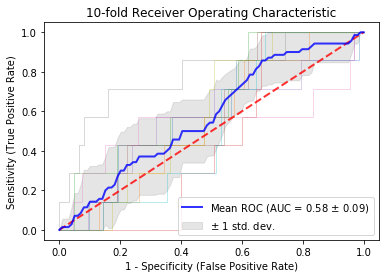

In [82]:
draw_roc(multi_class=False)
plt.savefig(os.path.join(path, "roc.png"))
plt.show()

### Original tutorial example - 2 classes

In [109]:
# # Import some data to play with
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target
# X, y = X[y != 2], y[y != 2]
# n_samples, n_features = X.shape

# # Add noisy features
# random_state = np.random.RandomState(0)
# X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [12]:
# # #############################################################################
# # Classification and ROC analysis

# # Run classifier with cross-validation and plot ROC curves
# cv = StratifiedKFold(n_splits=6)
# classifier = svm.SVC(kernel='linear', probability=True,
#                      random_state=random_state)

# tprs = []
# aucs = []
# mean_fpr = np.linspace(0, 1, 100)

In [13]:
# fig, ax = plt.subplots()
# for i, (train, test) in enumerate(cv.split(X, y)):
#     classifier.fit(X[train], y[train])
#     viz = plot_roc_curve(classifier, X[test], y[test],name='ROC fold {}'.format(i), alpha=0.3, lw=1, ax=ax)
#     interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
#     interp_tpr[0] = 0.0
#     tprs.append(interp_tpr)
#     aucs.append(viz.roc_auc)
#     print(viz.roc_auc)

# ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#         label='Chance', alpha=.8)

# mean_tpr = np.mean(tprs, axis=0)
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# std_auc = np.std(aucs)
# ax.plot(mean_fpr, mean_tpr, color='b',
#         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
#         lw=2, alpha=.8)

# std_tpr = np.std(tprs, axis=0)
# tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
# tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                 label=r'$\pm$ 1 std. dev.')

# ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
#        title="Receiver operating characteristic example")
# ax.legend(loc="lower right")
# plt.show()

### Adaptation - 2 classes

In [14]:
# # #############################################################################
# # Classification and ROC analysis

# # Run classifier with cross-validation and plot ROC curves
# cv = StratifiedKFold(n_splits=6)
# classifier = svm.SVC(kernel='linear', probability=True,
#                      random_state=random_state)

# tprs = []
# aucs = []
# mean_fpr = np.linspace(0, 1, 100)

# # print(X[test].shape, y[test].shape)

# fig, ax = plt.subplots()
# for i, (train, test) in enumerate(cv.split(X, y)):
#     classifier.fit(X[train], y[train])
#     viz.fpr, viz.tpr, thresholds = roc_curve(y[test], classifier.predict_proba(X[test])[:,1])
#     ax.plot(viz.fpr, viz.tpr, label='ROC fold {}'.format(i), alpha=0.3, lw=1)
#     interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
#     interp_tpr[0] = 0.0
#     tprs.append(interp_tpr)
#     viz.auc = auc(viz.fpr, viz.tpr)
#     aucs.append(viz.auc)
    
# ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#         label='Chance', alpha=.8)

# mean_tpr = np.mean(tprs, axis=0)
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# std_auc = np.std(aucs)
# ax.plot(mean_fpr, mean_tpr, color='b',
#         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
#         lw=2, alpha=.8)

# std_tpr = np.std(tprs, axis=0)
# tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
# tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                 label=r'$\pm$ 1 std. dev.')

# ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
#        title="Receiver operating characteristic example")
# ax.legend(loc="lower right")
# plt.show()

### Original tutorial example - multi-classes

In [15]:
# import numpy as np
# import matplotlib.pyplot as plt
# from itertools import cycle

# from sklearn import svm, datasets
# from sklearn.metrics import roc_curve, auc
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import label_binarize
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.metrics import roc_auc_score

# # Import some data to play with
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

# # Binarize the output
# y = label_binarize(y, classes=[0, 1, 2])
# n_classes = y.shape[1]

# # Add noisy features to make the problem harder
# random_state = np.random.RandomState(0)
# n_samples, n_features = X.shape
# X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# # shuffle and split training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
#                                                     random_state=0)

# # Learn to predict each class against the other
# classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
#                                  random_state=random_state))
# y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# print(y_score)
# print(y_score.ravel())

In [16]:
# import numpy as np
# import matplotlib.pyplot as plt
# from itertools import cycle

# from sklearn import svm, datasets
# from sklearn.metrics import roc_curve, auc
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import label_binarize
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.metrics import roc_auc_score

# # Import some data to play with
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

# # Binarize the output
# y = label_binarize(y, classes=[0, 1, 2])
# n_classes = y.shape[1]

# # Add noisy features to make the problem harder
# random_state = np.random.RandomState(0)
# n_samples, n_features = X.shape
# X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# # shuffle and split training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
#                                                     random_state=0)

# # Learn to predict each class against the other
# classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
#                                  random_state=random_state))
# y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel()) ### our ouput only includes probs sum 1
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])




# plt.figure()
# lw = 2
# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()

# # First aggregate all false positive rates
# all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# print(all_fpr)

# # Then interpolate all ROC curves at this points
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(n_classes):
#     mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# # Finally average it and compute AUC
# mean_tpr /= n_classes

# fpr["macro"] = all_fpr
# tpr["macro"] = mean_tpr
# roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# # Plot all ROC curves
# plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Some extension of Receiver operating characteristic to multi-class')
# plt.legend(loc="lower right")
# plt.show()